<a href="https://colab.research.google.com/github/Scubaman99/Scubaman99/blob/main/01a_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Data Science?

## Reading
[Chapter 1: 1.1 - 1.3](https://inferentialthinking.com/chapters/01/what-is-data-science.html)<br>
[Chapter 2: 2.1 - 2.4](https://inferentialthinking.com/chapters/02/causality-and-experiments.html)<br><br>

As the textbook showed, "Data Science is about drawing useful conclusions from large and diverse datasets through exploration, prediction, and inference."

The first important part of the description above is "large and diverse datasets." In this class we will discover the importance of using a large dataset with diverse data points if we want our conclusions about the data to be useful.

Then, with a large and diverse dataset, we will use programming techniques to apply statistical calculation to explore the data, make predictions and inferences, and draw conclusions about the data.

In other words, data science helps us to see the patterns that the datasets try to tell us.

## A Little Tour of Data Science
We now take a look at an example of data science at work by exploring data from the classic book *Little Women* by Louisa May Alcott, the same classic book used as an example in the textbook. We'll investigate what a large and diverse dataset means, then we explore the dataset and see whether we can make a prediction with the data. Along the way we'll see some of the code and statistical concepts that are used by data scientists.

[The book *Little Women* is downloaded from the textbook website, which references the original online copy at [Project Gutenberg](https://www.gutenberg.org/files/514/514-h/514-h.htm). You can use the link to read the online book if you like.]

### Gathering Data

In [1]:
# Tell the computer to read the book Little Women

import requests

# download the entire work from the textbook website
url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = requests.get(url).text

# separate into chapters
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

# print the first 190 characters of chapter 1 to check
print(little_women_chapters[0][:190])

ONE

PLAYING PILGRIMS

"Christmas won't be Christmas without any presents," grumbled Jo, lying
on the rug.

"It's so dreadful to be poor!" sighed Meg, looking down at her old
dress.


In [2]:
# Find the number of characters and number of words in the book

# initialize counters
total_characters = 0
total_words = 0

# go through all the text and count up all printable characters and words
for chapter in little_women_chapters:
    total_characters += len(chapter) - chapter.count(' ')
    words = chapter.split()
    total_words += len(words)

print(f'Number of characters: {total_characters:,d}')
print(f'Number of words: {total_words:,d}')

Number of characters: 872,468
Number of words: 188,764


In the output above we see that the dataset of characters and the dataset of words are both large, and each dataset is likely diverse because it has many different characters or words, as most books do.



### Analyze Data

Next we will analyze specific words in the text and see whether the data tells us something about the book.

First, we take the list of all chapters of the book and store them in a special container that's commonly used for data analysis: a DataFrame. A DataFrame is a table that can contain many rows and many columns. We'll put each chapter in a row of the DataFrame, so the resulting DataFrame has one column, where each row of the column is one chapter of the book.

In [3]:
# Store the chapters into a table called a DataFrame

import pandas as pd

# store the chapters into a table where each chapter is one row of the table
chapters = pd.DataFrame({'chapters': little_women_chapters})

# print the first 10 rows of the table to check
chapters.head(10)

,chapters
0,"ONE\r\n\r\nPLAYING PILGRIMS\r\n\r\n""Christmas ..."
1,TWO\r\n\r\nA MERRY CHRISTMAS\r\n\r\nJo was the...
2,"THREE\r\n\r\nTHE LAURENCE BOY\r\n\r\n""Jo! Jo!..."
3,"FOUR\r\n\r\nBURDENS\r\n\r\n""Oh, dear, how hard..."
4,"FIVE\r\n\r\nBEING NEIGHBORLY\r\n\r\n""What in t..."
5,SIX\r\n\r\nBETH FINDS THE PALACE BEAUTIFUL\r\n...
6,SEVEN\r\n\r\nAMY'S VALLEY OF HUMILIATION\r\n\r...
7,"EIGHT\r\n\r\nJO MEETS APOLLYON\r\n\r\n""Girls, ..."
8,"NINE\r\n\r\nMEG GOES TO VANITY FAIR\r\n\r\n""I ..."
9,TEN\r\n\r\nTHE P.C. AND P.O.\r\n\r\nAs spring ...


The book *Little Women* has 5 major characters: Meg, Jo, Beth, Amy, and Laurie. We want to predict which of the 5 characters is the main character of the story.

To do this, we'll count the number of times each name appears in the book. Counting the number of occurrences of a data point in a dataset is a basic statistics concept. From the count of each name we can infer who the main character is by choosing the name with the highest count.

In [4]:
# Find the number of times the names 'Meg', 'Jo', 'Beth', 'Amy', 'Laurie' appear

names = ['Meg', 'Jo', 'Beth', 'Amy', 'Laurie']
name_counts = pd.DataFrame(columns=['Name', 'Count'])

counts = {}

for name in names:
    count = 0
    for chapter in chapters['chapters']:
        count += chapter.lower().count(name.lower())
    counts[name] = count

for name, count in counts.items():
    name_counts = pd.concat([name_counts, pd.DataFrame({'Name': [name], 'Count': [count]})], ignore_index=True)

name_counts

,Name,Count
0,Meg,689
1,Jo,1837
2,Beth,474
3,Amy,651
4,Laurie,597


From the output above, we see that Jo has the highest count.

### Visualize Data

Even though the number for Jo is already very convincing, often in data science we display the resulting data in an appropriate plot to clearly show the pattern in the data. This is the called data visualization.

Let's plot the counts of all the names and see if data visualization really shows who the main character is.

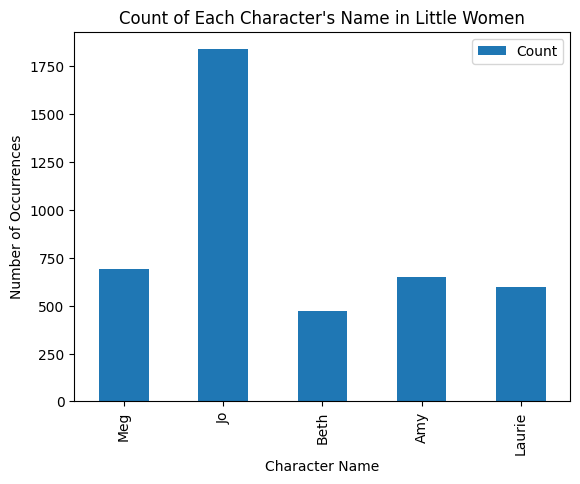

In [5]:
# Plot the count of each name

import matplotlib.pyplot as plt

name_counts.plot(x='Name', y='Count', kind='bar')
plt.xlabel("Character Name")
plt.ylabel("Number of Occurrences")
plt.title("Count of Each Character's Name in Little Women")
plt.show()

It's pretty clear that Jo's name appears the most in the book, so we can predict that Jo is the main character of the story, without having read the book!

Through this quick tour, we see a few key components of a data science application:

*   A large and diverse dataset. If we only looked at one chapter of the book (a small dataset), the count of each character name in the chapter may not be the same as the count in the entire book and we might arrive at the wrong main character. This is why choosing a large and diverse dataset is important.
*   Using the appropriate statistical methods and visualization methods, we can see different patterns in the data. In the example above we can infer who the main character is, and in the example shown in the textbook, we can infer which two characters are the love interest in the story.
*   By choosing a good dataset from the book and making proper inferencing on the data, we can come to a correct conclusion about a characteristic of the book (such as who the main character is) without reading the entire book. This illustrates the usefulness of data science.

It is the extraction of meaningful pattern or insight from data that makes data science an important tool for many industries, and it also makes data science the basis for machine learning and artificial intelligence.


## Causality

In addition to inferring specific characteristics of a large dataset, data scientists can also determine whether there is a cause and effect in a phenomenon from its data. Causality is the study of the cause (an event that happens) that leads to another event (the effect).  

As the textbook stated, it takes two stages to determine whether there is causality:
1. The observation stage, where one event seems to be associated with another event.
2. The analysis stage, where carefully designed experiments are conducted to determine if the association of the two events is actually a cause and effect.

### The Observation Stage

In the cholera example in the textbook, there were multiple cholera outbreaks that killed many people in London in the 1850's. At first people noticed that the air smelled bad around the areas where people died of cholera. There was an association between the bad smell and cholera deaths, and some people came to the conclusion that the air quality (the cause) led to the cholera deaths (the effect).

However, Dr. John Snow observed that people who lived next door to each other, and therefore breathing the same air, did not all die from cholera. Looking for a better explanation of the cholera deaths, Dr. Snow mapped the neighborhoods of London and the location of the cholera deaths. The map showed that most of the death locations were close to a particular water pump where people used for their water supply, the Broad Street pump. The map also showed that in other locations of London that used other water pumps, there were very few cholera deaths. There seemed to be an association between using water from the Broad Street pump and cholera.

However, the map also showed a few death locations that were farther away from the Broad Street pump. Investigation further into these deaths, Dr. Snow found that the people in these far away areas did use water from the Broad Street pump as part of their daily activity, even though they did not live close to it.

It seemed that a causality could be established: the water from the Broad Street pump (the cause) led to cholera deaths (the effect). Years later, it was confirmed that the Broad Street well, from which people pumped water, was indeed contaminated with sewage that had been seeping in underground. But at the time of Dr. Snow's investigation, no one knew this.

Fortunately, Dr. Snow was a data scientist ahead of his time. To further convince himself and the public that there was causality between the Broad Street pump water and cholera, he started the analysis stage.



### The Analysis Stage

In this stage, data scientists compare similar events to see if there is the same association. If it is, then causality can be determined.

Dr. Snow devised an experiment to test his theory about the association water began to cholera deaths. He gathered two types of data from two other large areas of London: the water source and the number of cholera deaths. These data are the same types of data of the Broad Street pump.

The two water sources were the Lambeth water company and the Southwark & Vauxhall water company. As shown in the [textbook](https://inferentialthinking.com/chapters/02/2/snow-s-grand-experiment.html), the results were clear: there were almost 10 times more deaths from the area that used Southwark & Vauxhall water than from the area that used Lambeth water. Lambeth's water was drawn from the Thames river at a point that was upriver from where the sewage was released into the river, while Southwark & Vauxhall's water was drawn downriver from where the sewage was released and was contaminated.

The result of Dr. Snow's experiment were:
- The experiment result matched the original observation at the Broad Street pump: contaminated water caused more cholera deaths.
- Moreover, the two events: the water source and the number of deaths, were the only differences between Lambeth and Southwark & Vauxhall in the experiment, making the experiment a valid test of causality.

If the people in the Lambeth area were wealthier and had better food and housing conditions, or if the people in the Southwark & Vauxhall area only lived in their house part of the year, then it would be difficult to pinpoint that contaminated water was the cause the cholera deaths.

---

A data scientist:
- Uses programming and statistical techniques to analyze large datasets and infer characteristics of the datasets
- Applies scientific and statistical methods to devise experiments that determine any causality in a dataset

The ability to make inferences and determine causality from data allows for data driven decisions, such as what medical treatment to use or what business policy to implement, and leads to developing artificial intelligence models that work with and make predictions based on causal relationships.
